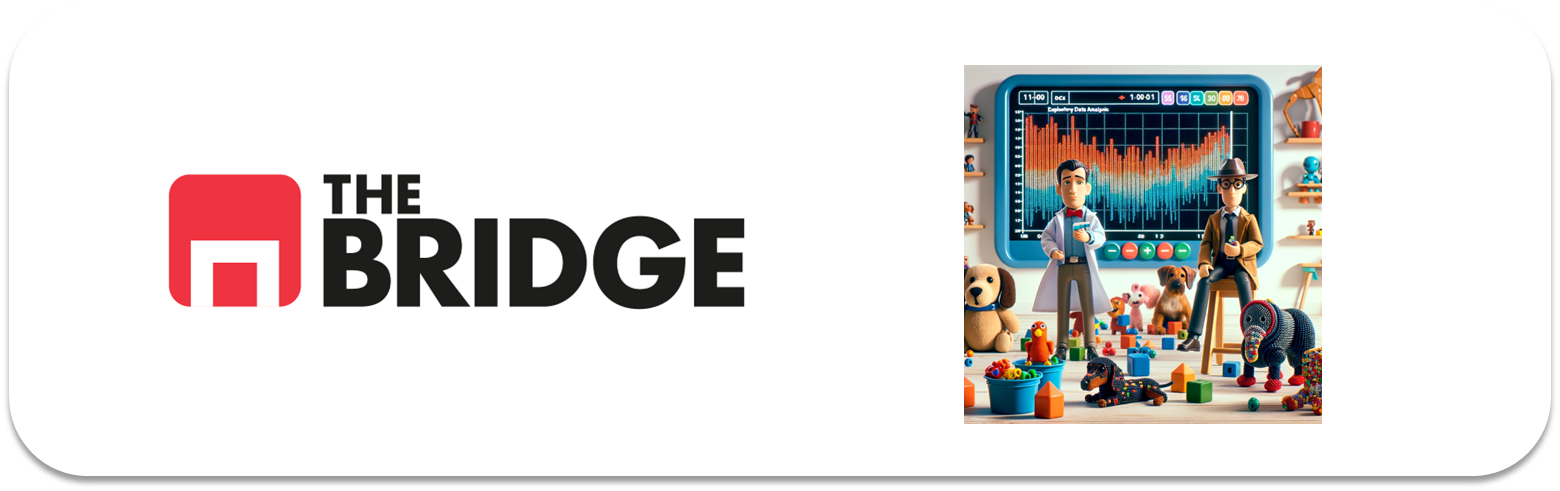

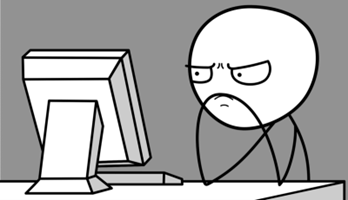

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import grafico_dispersion_con_correlacion,plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_grouped_histograms, plot_categorical_relationship_fin 

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [6]:
df_admisiones = pd.read_csv("./data/admission_data.csv")
print(df_admisiones.info())
print(df_admisiones.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12763 entries, 0 to 12762
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12763 non-null  int64 
 1   Year        12763 non-null  int64 
 2   Major       12763 non-null  object
 3   Gender      12763 non-null  object
 4   Admission   12763 non-null  object
dtypes: int64(2), object(3)
memory usage: 498.7+ KB
None
   Unnamed: 0  Year                    Major Gender Admission
0           0  1973       School of Medicine      F  Rejected
1           1  1973  Department of Economics      M  Accepted
2           2  1973                    Other      F  Accepted
3           3  1973                    Other      M  Accepted
4           4  1973                    Other      M  Rejected


In [7]:
df_admisiones =df_admisiones.drop(columns=["Unnamed: 0"])

### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

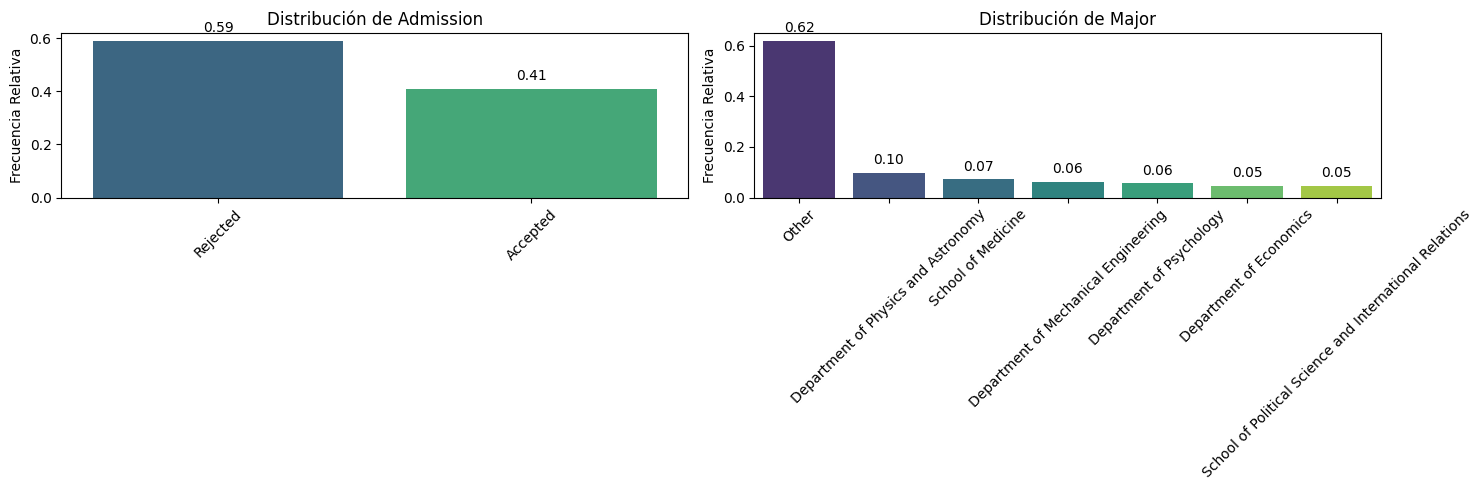

In [8]:
pinta_distribucion_categoricas(df_admisiones,["Admission","Major"], relativa= True, mostrar_valores= True)

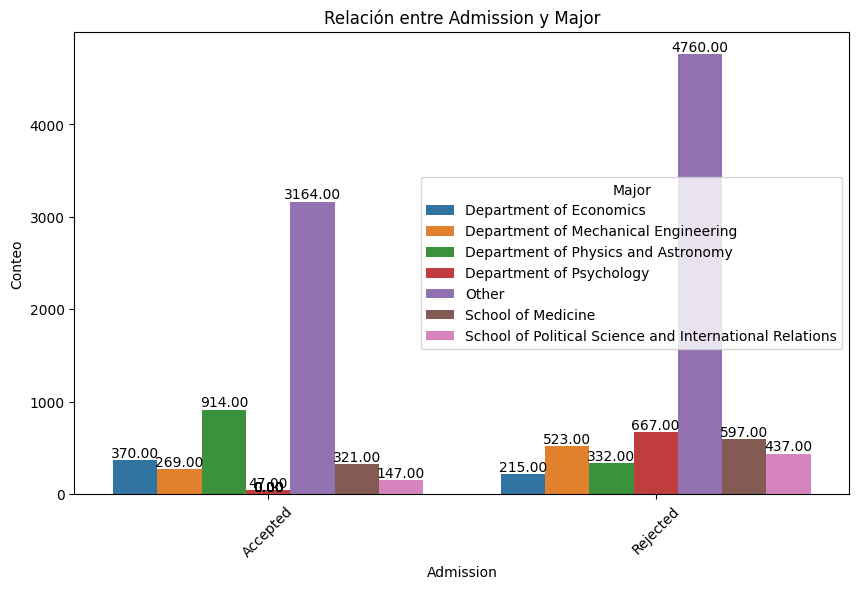

In [10]:
plot_categorical_relationship_fin(df_admisiones, "Admission","Major", show_values= True)

El departamento con menor porcentaje de admisiones es el de "Psicología", y el de mayor es "Otros" (y el más numeroso). Departamentos como Economía, Ingeniería Mecánica y Física y Astronomía están más equilibrados (aunque más rechazados que admitidos. Pero Psicología y Medicina tienen mayor diferencia entre admitidos y rechazados.)

### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

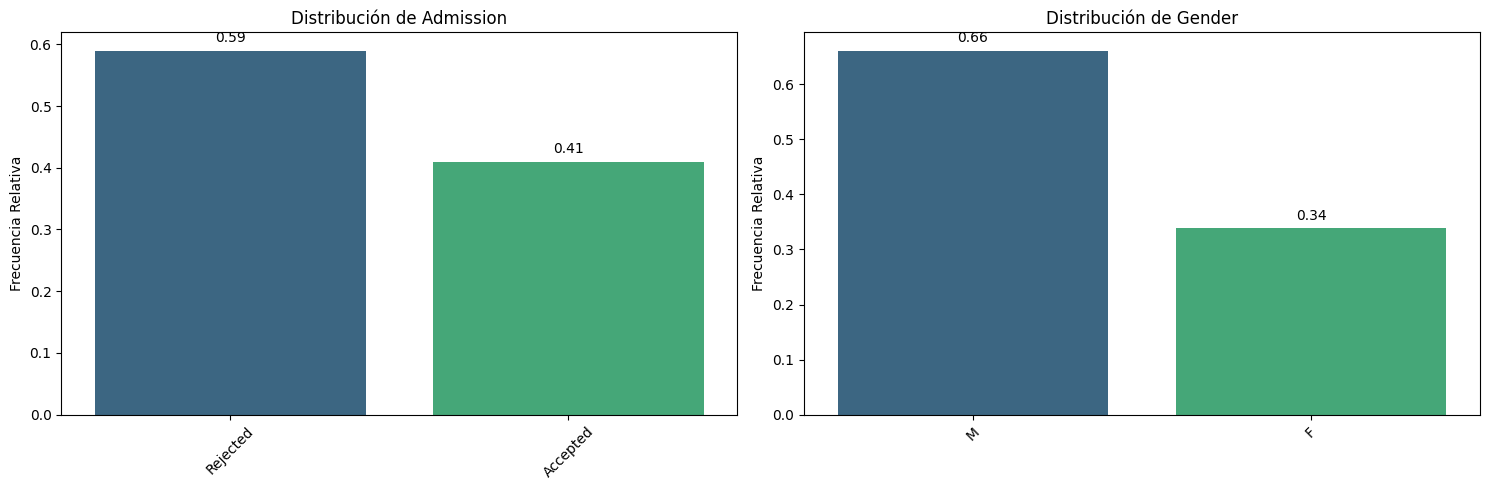

In [11]:
pinta_distribucion_categoricas(df_admisiones,["Admission","Gender"], relativa= True, mostrar_valores= True)

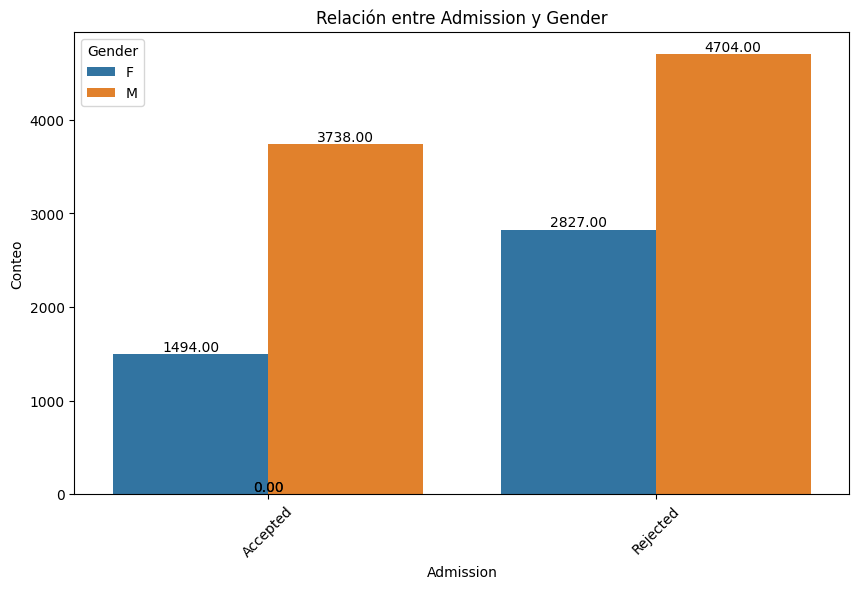

In [12]:
plot_categorical_relationship_fin(df_admisiones, "Admission","Gender", show_values= True)

Hay diferencia visual: aunque hay más hombres en total, también hay muchos mas admitidos que mujeres, que tienen menos admisiones que rechazo. En hombres, el nº de admitidos es bastante más alto. Posible desigualdad de género.

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [13]:
df_tips = pd.read_csv("./data/tips.csv")
print(df_tips.info())
print(df_tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
None
   Unnamed: 0  total_bill   tip     sex smoker  day    time  size
0           0       16.99  1.01  Female     No  Sun  Dinner     2
1           1       10.34  1.66    Male     No  Sun  Dinner     3
2           2       21.01  3.50    Male     No  Sun  Dinner     3
3           3       23.68  3.31    Male     No  Sun  Dinner     2
4           4       24.59  3.61  Female     No  Sun  Dinner     4


In [14]:
df_tips = df_tips.drop(columns=["Unnamed: 0"])

### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

(2,)


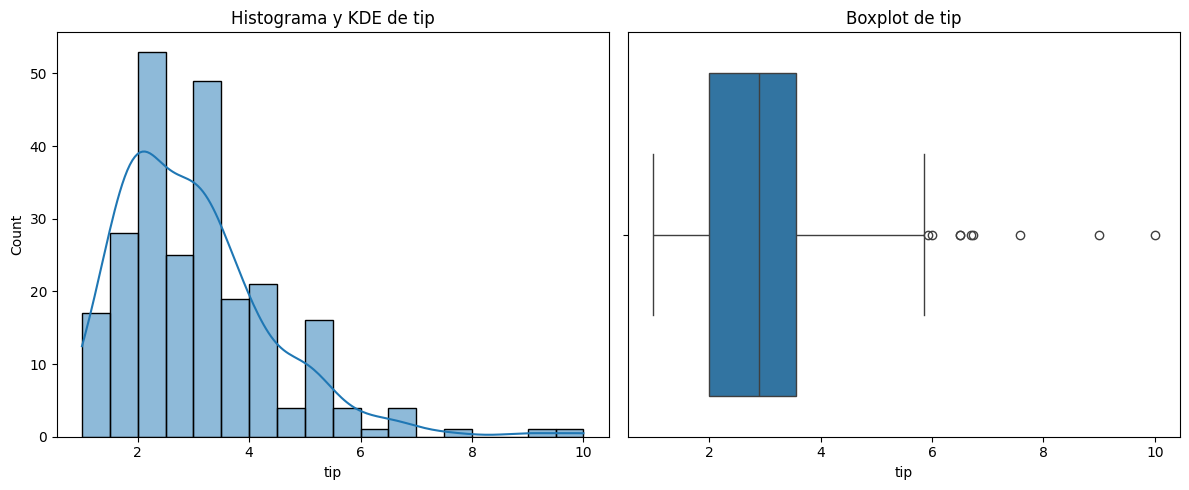

In [18]:
plot_combined_graphs(df_tips,["tip"])

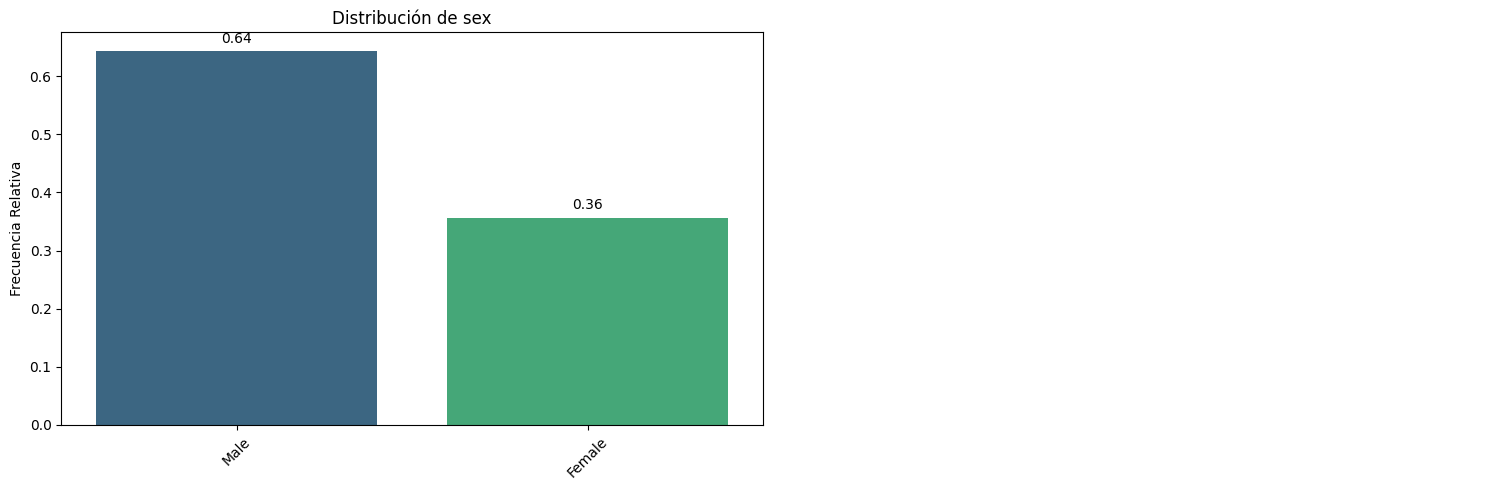

In [19]:
pinta_distribucion_categoricas(df_tips,["sex"], relativa= True, mostrar_valores= True)

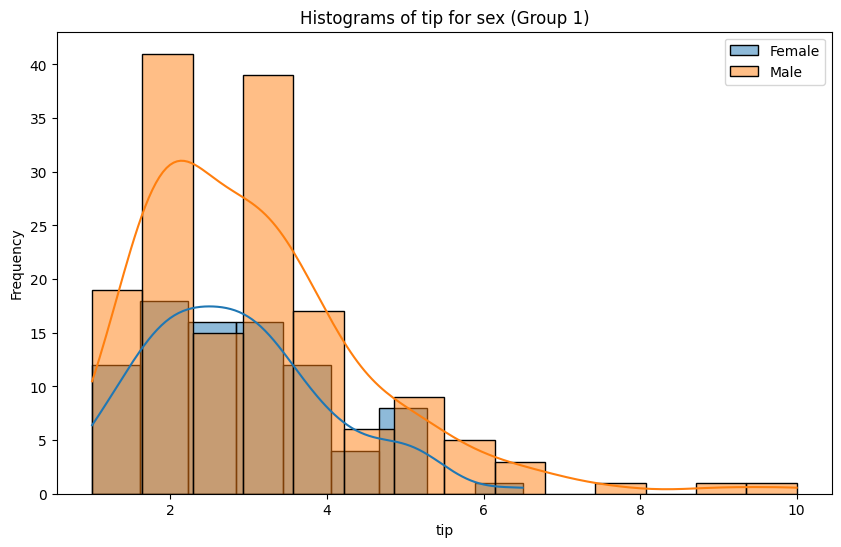

In [24]:
plot_grouped_histograms(df_tips,"sex", "tip", 20)

In [25]:
df_tips.groupby("sex")["tip"].agg(["mean", "median", "count"])

,mean,median,count
sex,,,
Female,2.833448,2.75,87
Male,3.089618,3.00,157


<Axes: xlabel='sex', ylabel='tip'>

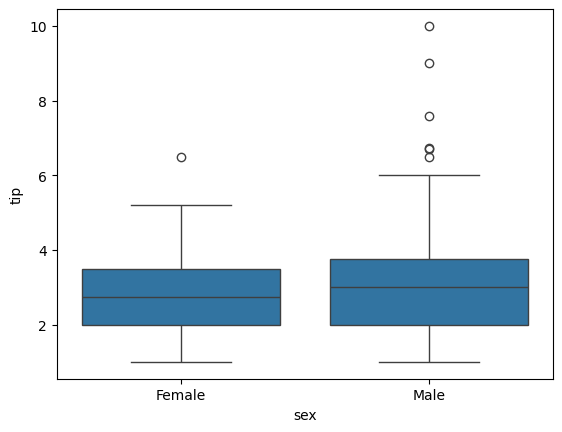

In [26]:
sns.boxplot(data=df_tips, x="sex", y="tip")

La media de propina de los hombres es algo superior a la de las mujeres. El boxplot muestra distribución parecida, aunque hay mas outliers en el grupo masculino en propinas alta. El histograma sugiere que la mayoría de propinas están entre 2 y 4 dólares en ambos sexos. No hay una diferencia extrema, pero el nº de registros por grupo es tambien desigual: 157 hombres vs 87 mujeres.

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

(2,)


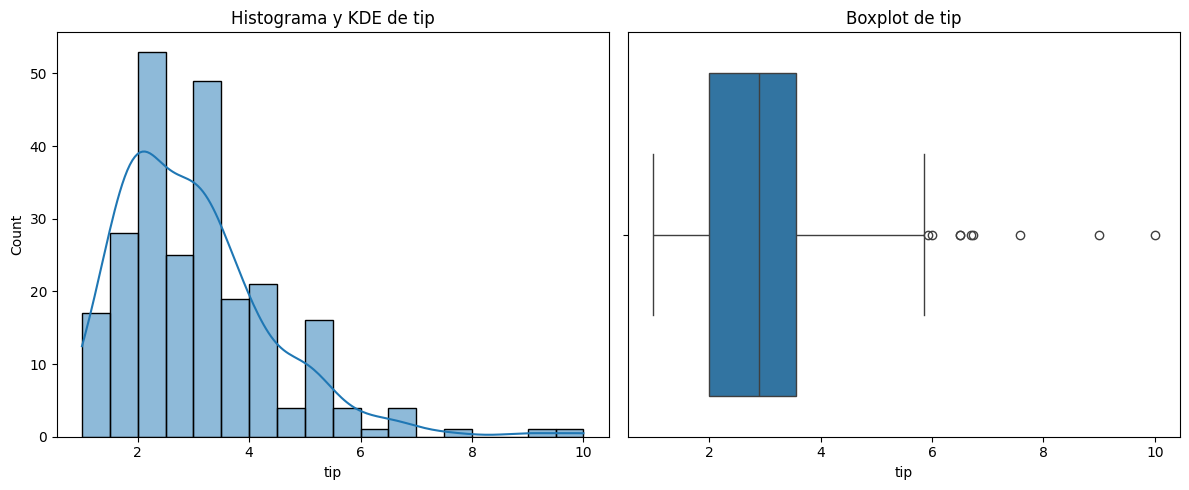

In [27]:
plot_combined_graphs(df_tips,["tip"])

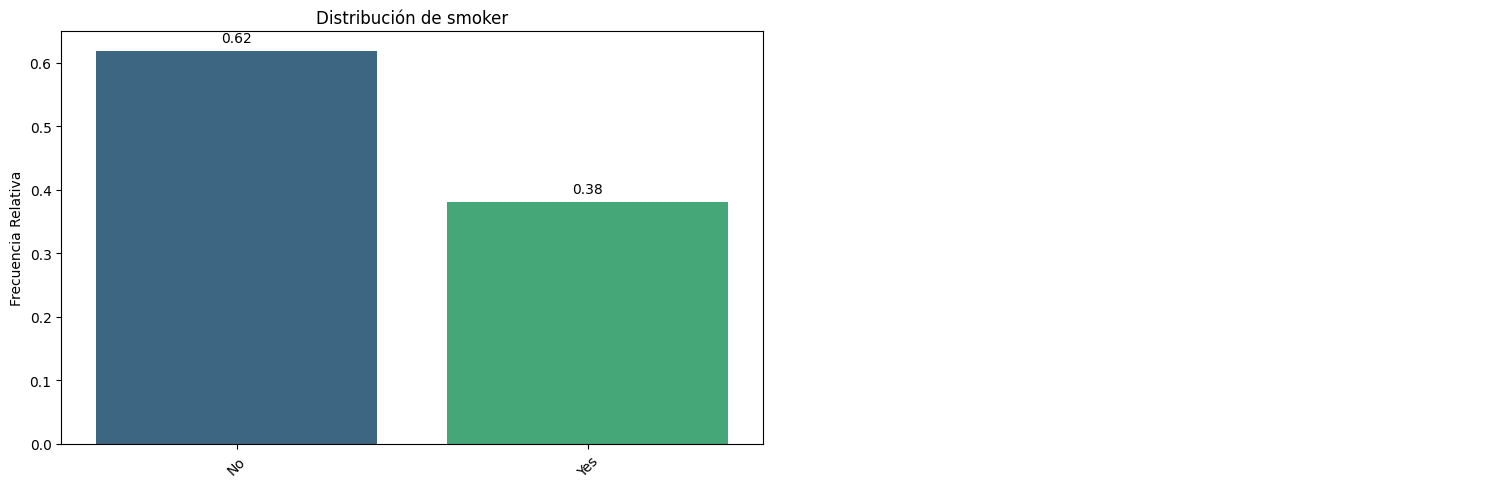

In [28]:
pinta_distribucion_categoricas(df_tips,["smoker"], relativa= True, mostrar_valores= True)

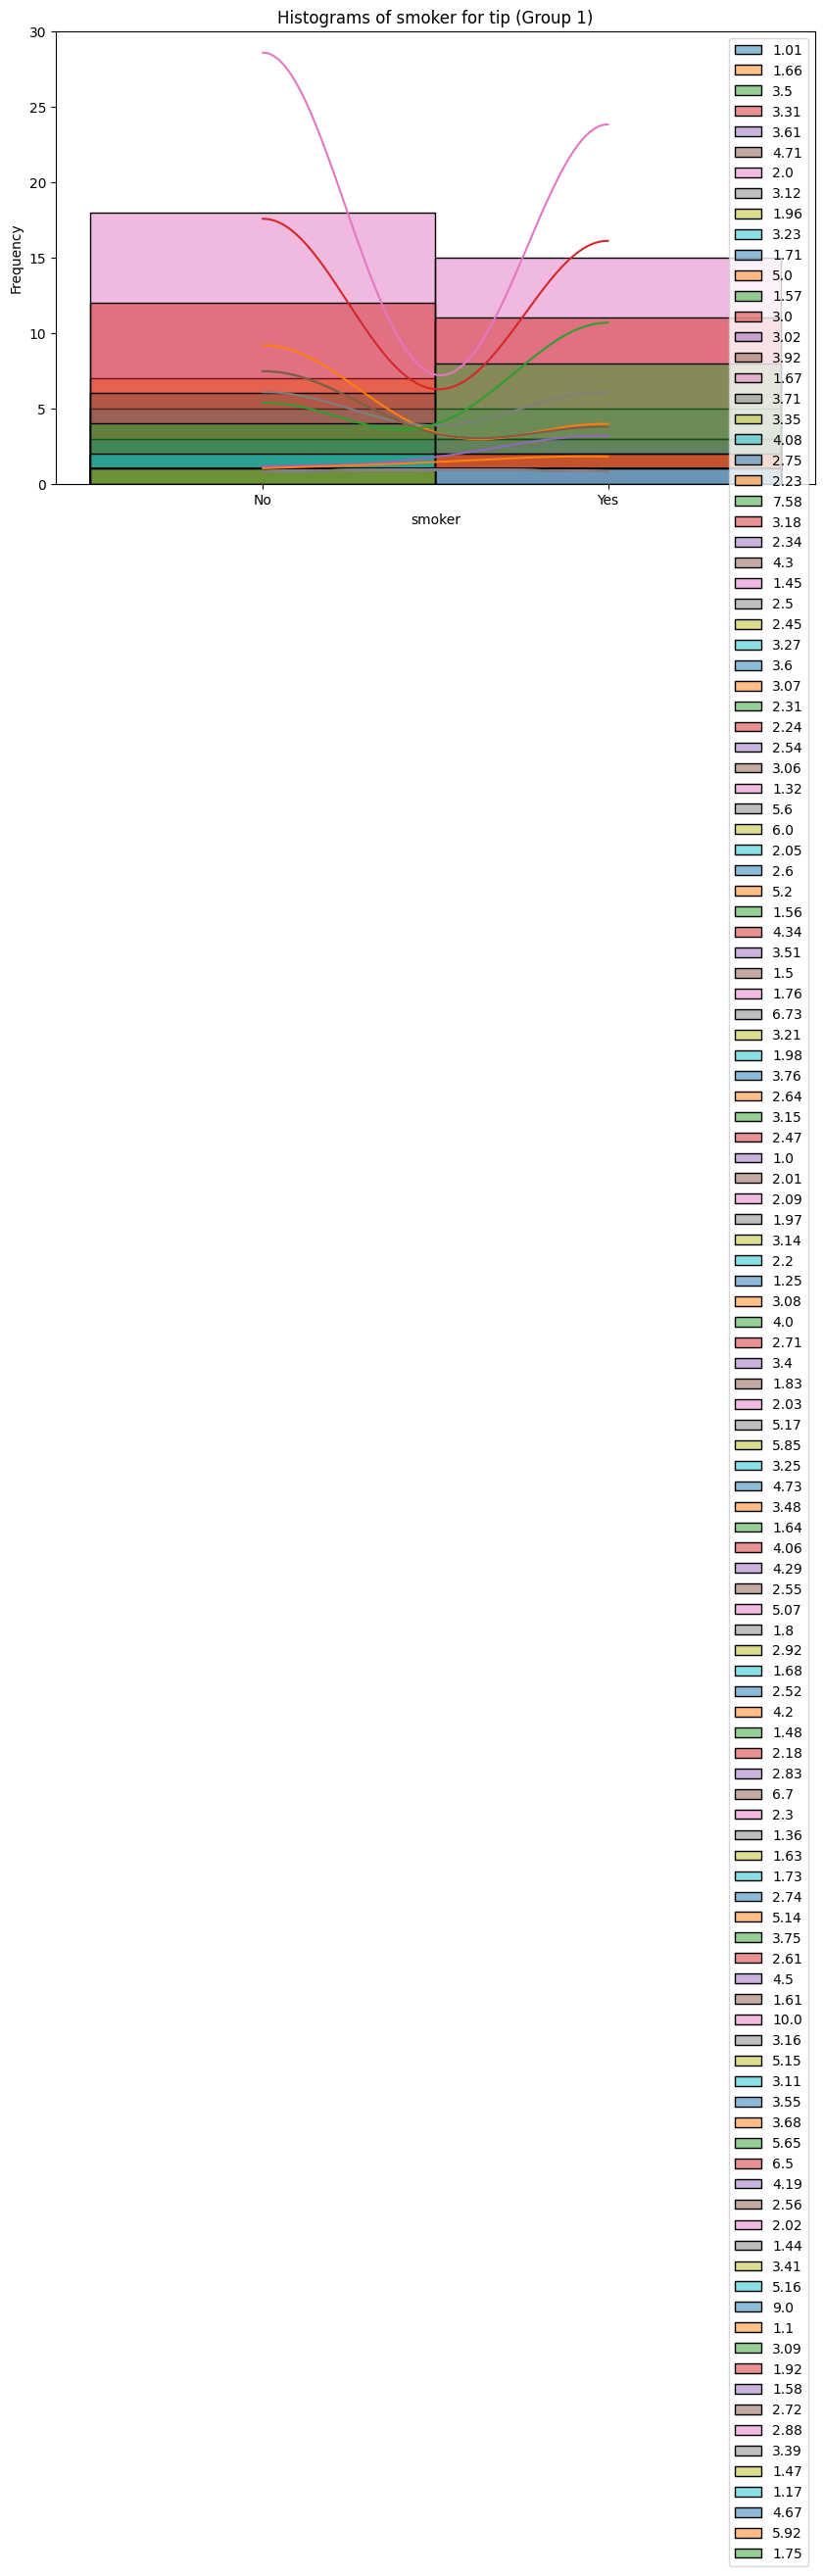

In [33]:
plot_grouped_histograms(df_tips,"tip", "smoker", 200)

In [31]:
df_tips.groupby("smoker")["tip"].agg(["mean", "median", "count"])

,mean,median,count
smoker,,,
No,2.991854,2.74,151
Yes,3.008710,3.00,93


<Axes: xlabel='tip', ylabel='smoker'>

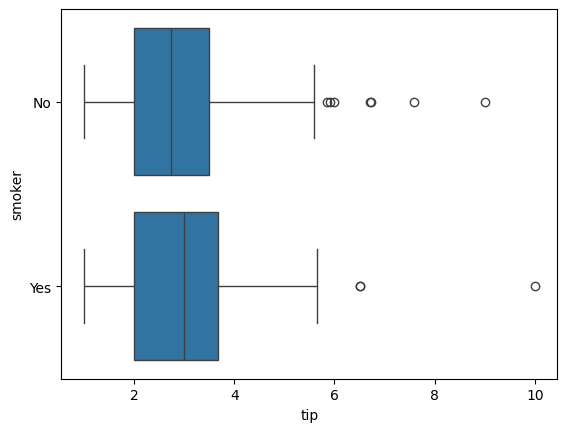

In [34]:
sns.boxplot(data=df_tips, x="tip", y="smoker")

La media y mediana de propinas son similares en fumadores y no fumadores. El boxplot muestra un poco de más dispersión en el grupo de fumadores, anque ambos tienen outliers (propinas altas). En el histograma, vemos que los fumadores tienen una concentración algo mayor de propinas en torno a 3-4 dólares, y los no fumadores entre 2-3 dólares. No hay diferencia significativa. El nº de observaciones es distinto, 151 no fumadores frente a 93 fumadores, y esto puede influir en la distribución. 

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [37]:
df_coches = pd.read_csv("./data/car_crashes.csv", sep='|')
print(df_coches.info())
print(df_coches.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB
None
   Unnamed: 0  total  speeding  alcohol  not_distracted  no_previous  \
0           0   18.8     7.332    5.640          18.048       15.040   
1           1   18.1     7.421    4.525          16.290       17.014   
2           2   18.6     6.510    5.208          15.624       17.856   
3           3   22.4     4.032    5.824         

In [39]:
df_coches = df_coches.drop(columns=["Unnamed: 0"])

### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

(2,)


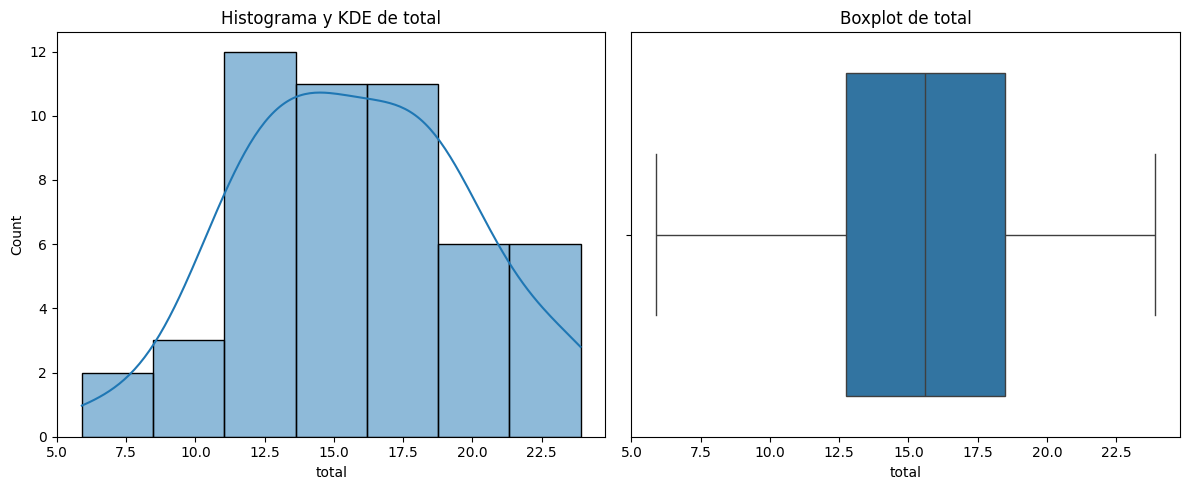

In [40]:
plot_combined_graphs(df_coches,["total"])

(2,)


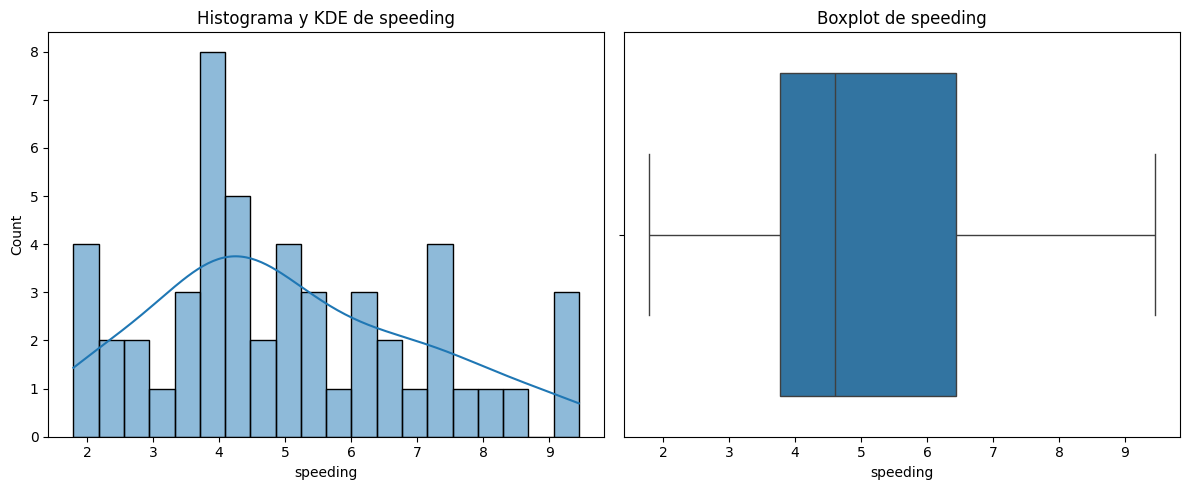

In [42]:
plot_combined_graphs(df_coches,["speeding"], bins=20)

In [43]:
df_coches[["total","speeding"]].describe()

,total,speeding
count,51.000000,51.000000
mean,15.790196,4.998196
std,4.122002,2.017747
min,5.900000,1.792000
25%,12.750000,3.766500
50%,15.600000,4.608000
75%,18.500000,6.439000
max,23.900000,9.450000


In [46]:
df_coches[["total","speeding"]].corr()

,total,speeding
total,1.000000,0.611548
speeding,0.611548,1.000000


In [47]:
from scipy.stats import pearsonr

pearsonr(df_coches["total"], df_coches["speeding"])

PearsonRResult(statistic=np.float64(0.6115476008001185), pvalue=np.float64(1.8670391109056865e-06))

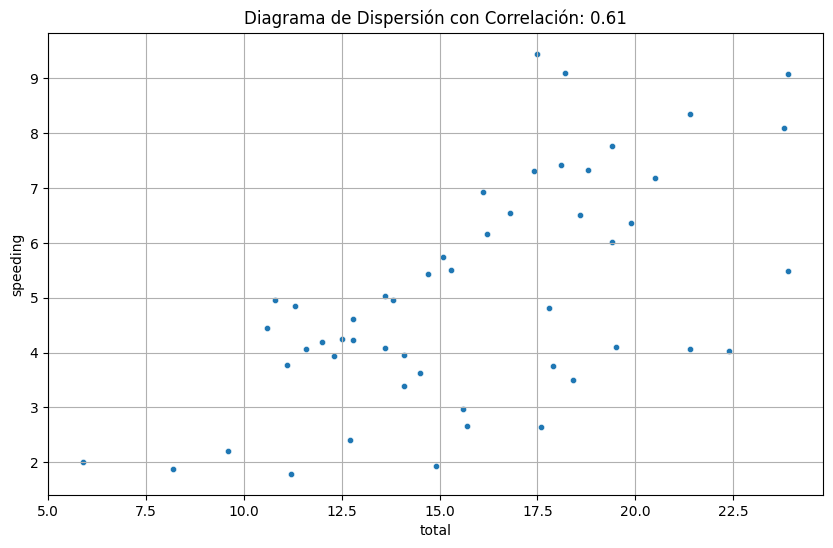

In [45]:
grafico_dispersion_con_correlacion(df_coches,"total","speeding", 20, mostrar_correlacion = True)

En el diagrama de dispersión se ve tendencia positiva, a más nº de accidentes totales, más relacionados con exceso de velocidad. El coeficiente de correlación de Pearson es 0.61, lo que indica correlación positiva moderada. El valor p es pequeño, y esto indica que la correlación es estadísticamente importante. 

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?